# Yuki Isomura


## Does Remote Working Provide a Positive Impact on Their Salary? 

Sub Questions:

- To what extent of workers' experience level, does remote working affect positively? 
- In what type of jobs, does remote working affect positively? 
- In which region, does remote working affect positively?  


Due to the global pandemic, the benefit of remote working is recognized. However, recent research implies that successive rate and productivity with remote working depends on the skills of individual workers. In this research project, I will analyze the ratio of remote working, workers' level of skills, area of the profession, company size, and their location and compare them by salary based on the assumption that more salary means better success in their jobs. In general, salary is not an absolute criterion of success. But as there are a limited number of criteria in this dataset, I state the salary as a clear criterion of success in their jobs.

In [2]:
#load file
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



df = pd.read_csv('../data/processed/ds_salaries_1.csv')

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_region
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Latin America
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,North America
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,North America
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,North America
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,North America


In [3]:
df1 = df.loc[:,["experience_level","employment_type","job_title","salary_in_usd","employee_residence","remote_ratio","company_location", "company_region"]]
df1 = df1.rename(columns = {'salary_in_usd':'salary'})
df1 # droped columns that are not used 

,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_region
0,MI,FT,Data Scientist,79833,DE,0,DE,Europe
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP,Asia
2,SE,FT,Big Data Engineer,109024,GB,50,GB,Europe
3,MI,FT,Product Data Analyst,20000,HN,0,HN,Latin America
4,SE,FT,Machine Learning Engineer,150000,US,50,US,North America
...,...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,154000,US,100,US,North America
603,SE,FT,Data Engineer,126000,US,100,US,North America
604,SE,FT,Data Analyst,129000,US,0,US,North America
605,SE,FT,Data Analyst,150000,US,100,US,North America


# **Milestone 3**

## Q1. Does Remote Working Provide a Positive Impact on Their Salary?

[Text(0.5, 1.0, 'Salary Distribution by Ratio of Remote Working'),
 Text(0.5, 0, 'Ratio of Remote Working'),
 Text(0, 0.5, 'Salary (USD)')]

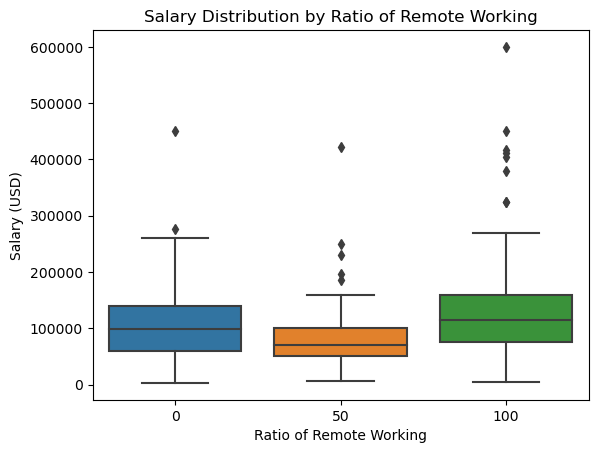

In [4]:
sns.boxplot(data = df1, x="remote_ratio", y= "salary").set(title = 'Salary Distribution by Ratio of Remote Working', xlabel = 'Ratio of Remote Working', ylabel = 'Salary (USD)')

### Analysis 1.0

Based on the plot above, it is the worst to do the combined use of remote and in-person working. Full in-person working and full remote working does not have much difference.   
In the analysis 2-4, I want to investigate whether this is consistent for any conditions.   
So far, the answer to the research question is that shifting from in-person working to remote working does not provide a benefit in terms of salary and it might give a negative impact for the incomplete shifting in the general data science job field. 

## Q2. To what extent of workers' experience level, does remote working affect positively? 

[Text(0.5, 1.0, 'Salary Distribution by Experience Level for Different Ratio of Remote Working'),
 Text(0.5, 0, 'Experience Level of Workers'),
 Text(0, 0.5, 'Salary (USD)')]

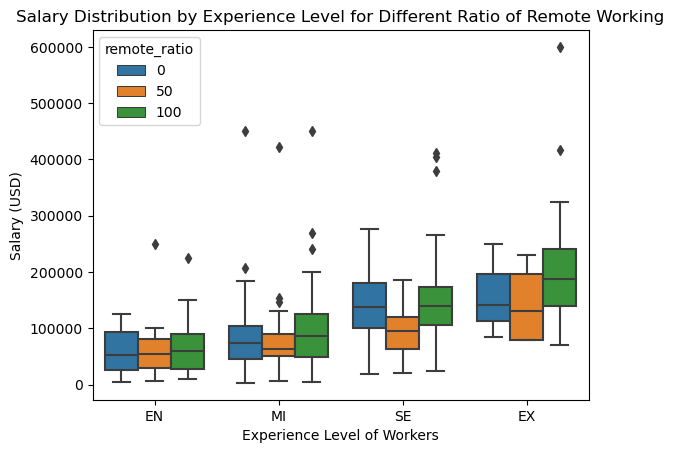

In [5]:
# EN...Entry-level, MI...Mid-level, SE...Senior-level, EX...Executive-level
sns.boxplot(data = df1, x="experience_level", y= "salary", hue = "remote_ratio", order = ['EN','MI','SE','EX']).set(title = 'Salary Distribution by Experience Level for Different Ratio of Remote Working', xlabel = 'Experience Level of Workers', ylabel = 'Salary (USD)')

### Analysis 2.0

First of all, in any experience level, the combined use of in-person and remote working provided the worst productivity. This result is consistent from Analysis 1.0. In addition to it, as the experience level goes higher, the difference in salary of remote ratio of 50% and 100% gets bigger.    
However, differences in full in-person working and full remote working are not small for Executive-level experienced workers. There is an obvious advantage in remote working for them.    

## Q3. In what type of jobs, does remote working affect positively? 

In [6]:
df_job_count = df1.groupby('job_title').count().rename(columns = {'experience_level':'count'}).sort_values('count',ascending = False).iloc[:,:1].reset_index()
df_job_count[df_job_count['count'] > 10]

,job_title,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11


Since it is difficult to categorize jobs into a few groups without knowing their precise duties, I will pick a few jobs that have a certain number of workers to avoid lack of data and compare them by plot.    
Based on the chart above, Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Research Scientist, Data Science Manager, and Data Architect have more than 10 workers.    

In [7]:
df_popular_jobs = df1[df1['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 'Data Science Manager', 'Data Architect'])].reset_index(drop = True)
df_popular_jobs # df1 only with Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Research Scientist, Data Science Manager, and Data Architect.  

,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_region
0,MI,FT,Data Scientist,79833,DE,0,DE,Europe
1,SE,FT,Machine Learning Engineer,150000,US,50,US,North America
2,EN,FT,Data Analyst,72000,US,100,US,North America
3,MI,FT,Data Scientist,35735,HU,50,HU,Europe
4,EN,FT,Data Scientist,51321,FR,0,FR,Europe
...,...,...,...,...,...,...,...,...
447,EN,FT,Data Analyst,52000,CA,0,CA,North America
448,SE,FT,Data Engineer,154000,US,100,US,North America
449,SE,FT,Data Engineer,126000,US,100,US,North America
450,SE,FT,Data Analyst,129000,US,0,US,North America


[Text(0.5, 1.0, 'Salary Distribution by Jobs for Different Ratio of Remote Working'),
 Text(0.5, 0, 'Salary (USD)'),
 Text(0, 0.5, 'Job Title')]

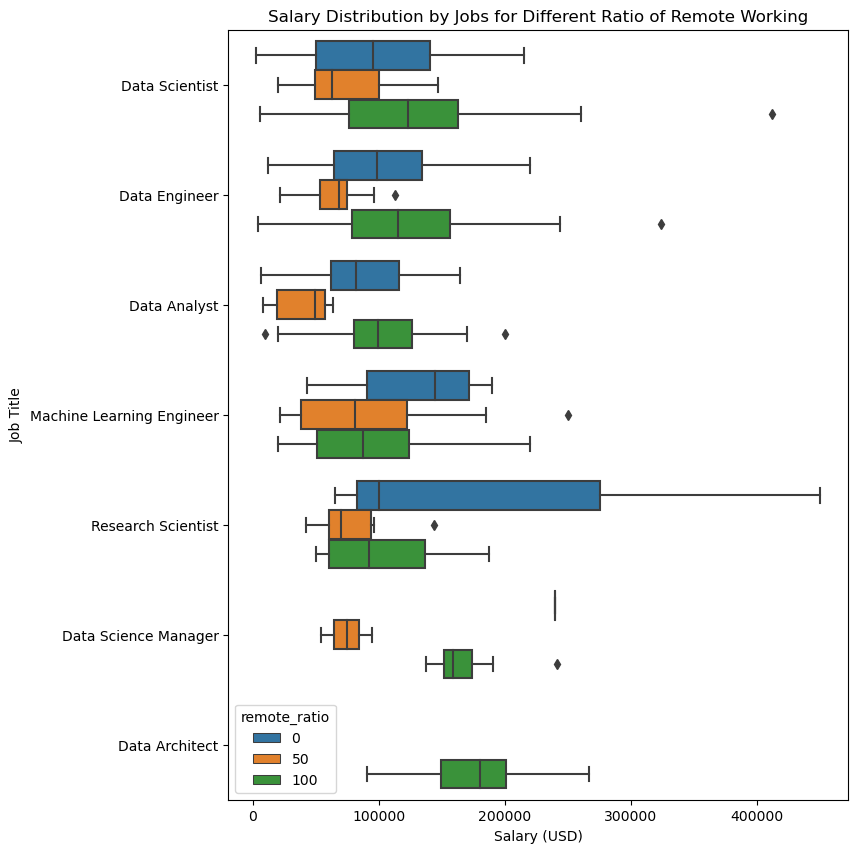

In [8]:
plt.figure(figsize=(8, 10))
sns.boxplot(data = df_popular_jobs, x="salary", y= "job_title", hue = 'remote_ratio', order = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 'Data Science Manager', 'Data Architect']).set(title = 'Salary Distribution by Jobs for Different Ratio of Remote Working', xlabel = 'Salary (USD)', ylabel = 'Job Title')

### Analysis 3.0

Based on the plot above, the utility of remote working differs by jobs. As Data Scientist, Data Engineer, and Data Analyst are similar jobs, the distributions are very similar. They also occupy `(143+132+97) / 607 = 61.29%` of the total amount of data, therefore, the shapes of the plot are homogeneous as the plot in Analysis 1.    
On the other hand, Machine Learning Engineer, Research Scientist and Data Science Manager have a property that full in-person working provides better advantages than full remote working, which is inconsistent from Analysis 1. But we need to note that those jobs have relatively little data.    
In Data Architect, due to the lack of data, all the workers belong to full remote working, thus, it is not possible to evaluate its effectiveness.    
Overall, it can be said that validity of remote working varies by the jobs but it is not easy or impossible to find the similarities due to the limited sources.    

## Q4. In which region, does remote working affect positively?

In [9]:
df_region_count = df1.groupby('company_region').count().rename(columns = {'experience_level':'count'}).sort_values('count',ascending = False).iloc[:,:1].reset_index()
df_region_count

,company_region,count
0,North America,385
1,Europe,157
2,Asia,38
3,Latin America,9
4,Middle East,9
5,Oceania,5
6,Africa,4


[Text(0.5, 1.0, 'Salary Distribution by Region for Different Ratio of Remote Working'),
 Text(0.5, 0, 'Salary (USD)'),
 Text(0, 0.5, 'Region of Company')]

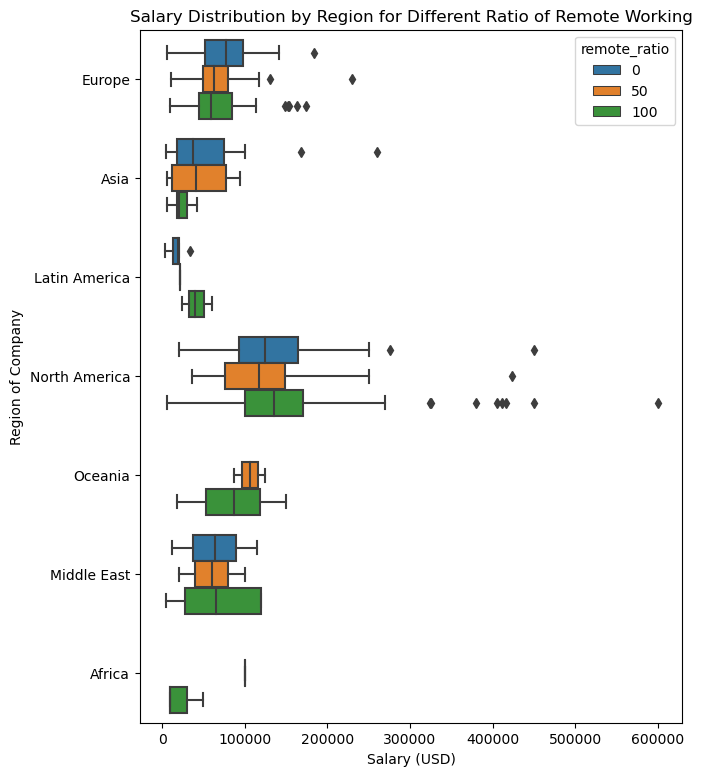

In [10]:
plt.figure(figsize=(7, 9))
sns.boxplot(data = df1, x="salary", y= "company_region", hue = 'remote_ratio').set(title = 'Salary Distribution by Region for Different Ratio of Remote Working', xlabel = 'Salary (USD)', ylabel = 'Region of Company')


### Analysis 4.0

Based on the plot above, it can be stated that validity of remote working is very unique to the region. In Europe and North America, the shape of the plots are very similar to Analysis 1. Combined use of in-person and remote working provides the worst productivity, and full in-person and full remote working do not have much difference. But we need to note that this is happening because the sum of them occupies `(157+385)/607 = 89.29%` of the total data.    
On the other hand, in Asia, full in-person working and combined use of in-person and remote working have better effectiveness than full remote working to a huge extent. It is not possible to analyze the cause of this phenomenon but it is an interesting property that is worth noting.    
In other remaining regions, the data are not accurate enough to analyze due to the lack of data.   

### Analysis 1.1

Now I am back to Analysis 1.  
In summary of Analysis 2-4, workers tend to be productive when their working style is fully in-person or fully remote and be less productive when combined. This tendency is strongly applied to Entry to Senior-level of workers, regular data analysts, and workers in North American or European regions. However there are a few exceptional conditions. Executive-level workers tend to be better successful in fully remote working than fully in-person. Asian workers greatly impair　productivity in full remote working. Effectiveness of remote working differs by job type so much. 

# Next Analysis Plan

Through this EDA, I came up with other research questions that are related to remote working. The questions I will add in the next milestone are the following.
- How has the salary versus remote working changed over the time?
- Is there any difference in effectiveness of remote working when the company location and employee's residence are the same and different?   

The first question is about the transition of salary over time. Remote working has spread out exponentially when COVID-19 hit us. I assume that people were not used to the remote working at the time it started. Thus, it is worth researching how it has changed over the years.   
The second question is about international working. One thing I need to remember due to the limitation of this dataset is that even if the employees were living within the same country as the company location, it does not necessarily mean they are living within a small distance from their office. 

In addition, in this EDA, I could not break jobs into multiple groups based on their job type. So in the next milestone, I would like to research about each job and categorize them into some groups if I had time. 

# **Milestone 4**

## Task1
Nothing new from milestone 3. Below are the code used in milestone 3 to process data with method chaining. 

In [11]:
df = pd.read_csv('../data/processed/ds_salaries_1.csv')
df1 = df.loc[:,["experience_level","employment_type","job_title","salary_in_usd","employee_residence","remote_ratio","company_location", "company_region"]].rename(columns = {'salary_in_usd':'salary'})
# df1 # droped columns that are not used 

df_job_count = df1.groupby('job_title').count().rename(columns = {'experience_level':'count'}).sort_values('count',ascending = False).iloc[:,:1].reset_index()
df_job_count[df_job_count['count'] > 10]
df_popular_jobs = df1[df1['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 'Data Science Manager', 'Data Architect'])].reset_index(drop = True)
# df_popular_jobs # df1 only with Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Research Scientist, Data Science Manager, and Data Architect.  

df_region_count = df1.groupby('company_region').count().rename(columns = {'experience_level':'count'}).sort_values('count',ascending = False).iloc[:,:1].reset_index()
# df_region_count # number of workers in corresponding regions.



## Task 2

In [12]:
def processed_df(): 
    """
    This function loads a dataset with salary integrated to usd. 

    Returns:
        df: Dataframe
            Processed dataframe. 
    """
    df = pd.read_csv('../data/processed/ds_salaries_1.csv')
    df = (
        df.drop(columns={'salary', 'salary_currency'})
          .rename(columns = {'salary_in_usd':'salary'})
    )
    return df

In [13]:
# test processed_df() 
df = processed_df()
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,company_region
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,Latin America
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,North America
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,North America
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,North America
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,North America
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,North America


In [14]:
def boxplot(data=None, x=None, y=None, hue=None, order=None, hue_order=None,
            title=None, xlabel=None, ylabel=None, figsize=None):
    """
    This function is a conbination of sns.boxplot(), sns.set(), and plt.figure . 
    
    Args:
        data: Dataframe, default:None 
            Dataframe used to display a boxplot. 
        x: String, default:None
            Column name in data to be considered as x-axis. 
        y: String, default:None
            Column name in data to be considered as y-axis. 
        hue: String, optional, default:None
            Column name in data to be considered as hue. 
        order: list of Strings, optional, default:None
            Order to plot the categorical levels in. 
        hue_order: list of Strings, optional, default:None
            Hue order to plot the categorical levels within each category. 
        title: String, optional, default:None
            Title of the plot. 
        xlabel: String, optional, default:None
            X-label of the plot. 
        ylabel: String, optional, default:None
            Y-label of the plot. 
        figsize: (float, float), optional, default:None 
            Figure size of the plot. 

    Returns:
        plot: Boxplot
            Boxplot designed by specified 
    """
    plt.figure(figsize=figsize)
    plt.clf()
    plot = (
        sns.boxplot(data = data, x = x, y = y, hue=hue, order=order, hue_order=hue_order)
           .set(title = title, xlabel = xlabel, ylabel = ylabel)       
    )
    plt.figure(figsize=(6.4, 4.8)) # restore default value
    return plot

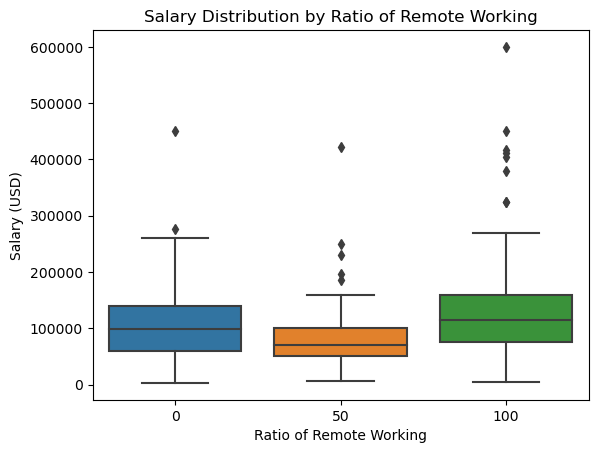

<Figure size 640x480 with 0 Axes>

In [15]:
# test boxplot() 1
plot1 = boxplot(data=df, x="remote_ratio", y="salary", 
               title='Salary Distribution by Ratio of Remote Working', 
               xlabel = 'Ratio of Remote Working', ylabel = 'Salary (USD)')
plt.show(plot1)

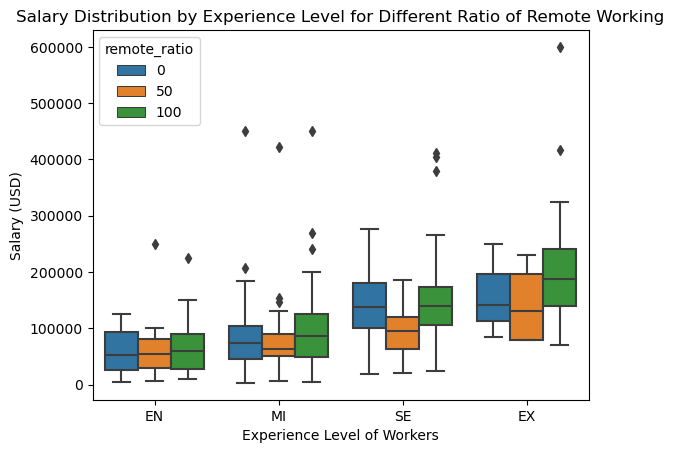

<Figure size 640x480 with 0 Axes>

In [16]:
# test boxplot() 2
plot2 = boxplot(data = df, x="experience_level", y= "salary", 
        hue = "remote_ratio", order = ['EN','MI','SE','EX'], 
        title = 'Salary Distribution by Experience Level for Different Ratio of Remote Working', 
        xlabel = 'Experience Level of Workers', ylabel = 'Salary (USD)')
plt.show(plot2)

In [17]:
def extract_match(data=None, col=None, lst=None):
    """
    This function extracts the rows that matches any of the elements in lst within specified column. 

    Args:
        data: Dataframe, default:None
            Dataframe to be extracted from. 
        col: String, default:None
            Name of the column to be considered in finding matches
        lst: list of Strings, default:None
            List of elements to be matched with. 
            Rows that match with any elements in this list will be included in the output. 
    Returns:
        df: Dataframe
            Dataframe that only holds the matched columns. 
    """
    
    df = (
        data[data[col].isin(lst)].reset_index(drop = True)
    )
    return df


In [18]:
# test extract_match()
df_popular_jobs = extract_match(df,'job_title', 
                                ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist',
                                 'Data Science Manager', 'Data Architect'])
df_popular_jobs['job_title'].unique()

array(['Data Scientist', 'Machine Learning Engineer', 'Data Analyst',
       'Data Engineer', 'Research Scientist', 'Data Science Manager',
       'Data Architect'], dtype=object)

In [19]:
def count_category(data=None, column=None, ascending = False):
    """
    This function counts the number of rows of each unique element within the specified column. 
    
    Args:
        data: Dataframe, default:None
            Dataframe to be consedered in counting. 
        column: String, default:None
            Column that is grouped by and counted unique elements. 
        ascending: boolean, optional, default:False
            Specifies whether the elements are sorted in ascending or descending order 
            based on the count. 
            By default, descending order.

    Returns:
        df: Dataframe
            Dataframe for each item in specified group and the number of corresponding elements. 
    """
    df = (
        data.groupby(column)
            .count()
    )    
    df = (
        df.rename(columns = {df.columns[0]:'count'})
          .sort_values('count',ascending = ascending)
          .iloc[:,:1]
          .reset_index()
    )
    return df

In [20]:
# test count_category() 1
df_job_count = count_category(data = df, column = 'job_title')
df_job_count

,job_title,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Director of Data Science,7


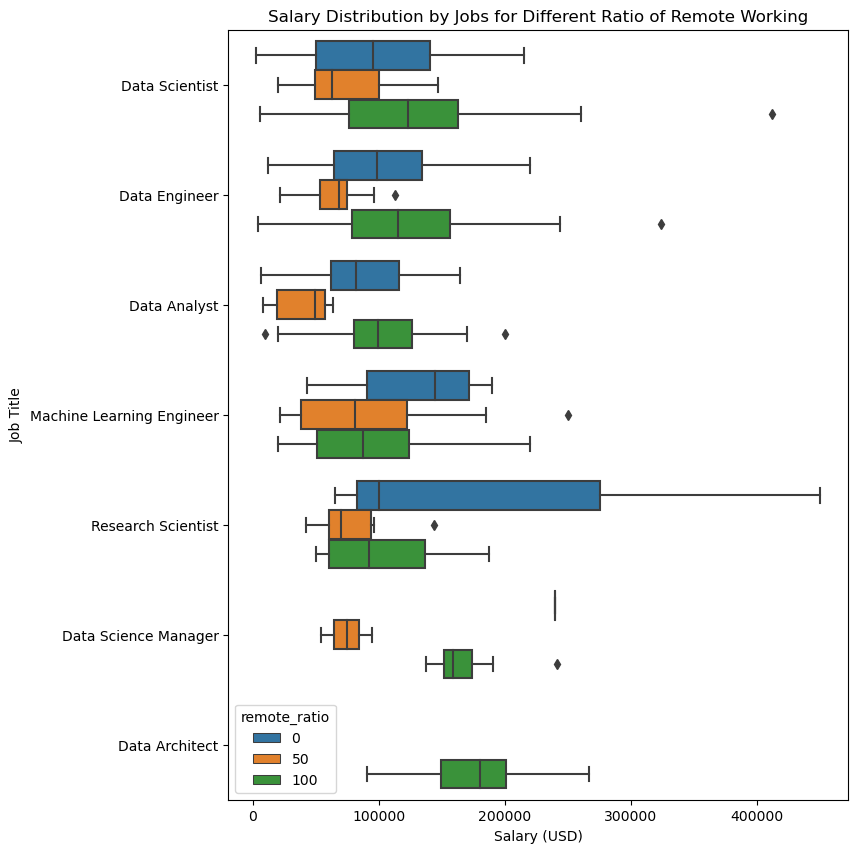

<Figure size 640x480 with 0 Axes>

In [21]:
# test boxplot() 3
boxplot(df_popular_jobs, x="salary", y= "job_title", hue = 'remote_ratio', 
        order = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist', 
                 'Data Science Manager', 'Data Architect'],
        title = 'Salary Distribution by Jobs for Different Ratio of Remote Working', 
        xlabel = 'Salary (USD)', ylabel = 'Job Title', figsize=(8, 10))
plt.show()


In [22]:
# test count_category() 2
df_region_count = count_category(data = df, column = 'company_region')
df_region_count

,company_region,count
0,North America,385
1,Europe,157
2,Asia,38
3,Latin America,9
4,Middle East,9
5,Oceania,5
6,Africa,4


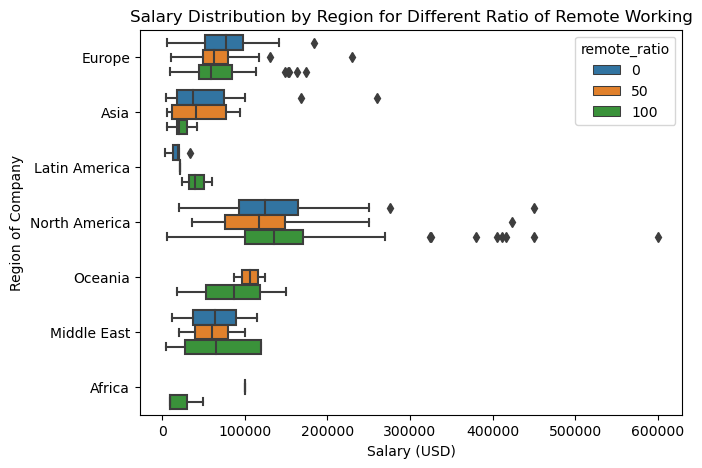

<Figure size 640x480 with 0 Axes>

In [23]:
# test boxplot() 4
boxplot(data = df, x="salary", y= "company_region", hue = 'remote_ratio', 
        title = 'Salary Distribution by Region for Different Ratio of Remote Working',
        xlabel = 'Salary (USD)', ylabel = 'Region of Company', figsize=(7,5))
plt.show()

In [24]:
def count_category_groupby(data=None, column1=None, column2=None, 
                           order_column1=None, order_column2=None):
    """
    This function counts the number of elements of unique elements of column2 within the unique elements in column1. 

    Args:
        data: Dataframe, default:None
            Dataframe to be considered. 
        column1: String, default:None
            Column name to be grouped by on rows. 
        column2: String, default:None
            Column name to be grouped by on columns.
        order_column1: list of String, optional, default:None
            List of unique elements in column1.  
            Rows are ordered as specified. 
        order_column2: list of String, optional, default:None
            List of unique elements in column2.  
            Columns are ordered as specified. 

    Returns:
        merged_df: Dataframe
            Dataframe of number of elements of unique elements in column1 versus unique elements in column2. 
            The rows and columns are ordered as specified. 
    """
    list_df = list()
    for i in data[column2].unique():
        df = count_category(data = data[data[column2] == i], column = column1).rename(columns={'count':i})
        list_df.append(df)
        
    merged_df = list_df[0]
    for i in list_df[1:]:
        merged_df = pd.merge(merged_df, i, how='outer')
    
    merged_df = (
        merged_df.set_index(keys=column1)
                 .reindex(index=order_column1)
                 .reindex(columns=order_column2)
                 .reset_index()
    )
    return merged_df

In [25]:
# test count_category_groupby() 1
count_category_groupby(df, 'company_size', 'company_region')

,company_size,Europe,Asia,Latin America,North America,Oceania,Middle East,Africa
0,M,72,11,3,234,1,4,1
1,L,58,17,2,117,1,2,1
2,S,27,10,4,34,3,3,2


In [26]:
# test count_category_groupby() 2
count_category_groupby(df, 'company_size', 'company_region',
                       order_column1=['L','M','S'], 
                       order_column2=['North America', 'Europe', 'Asia', 'Latin America',
                                      'Middle East', 'Oceania', 'Africa'], 
                       )

,company_size,North America,Europe,Asia,Latin America,Middle East,Oceania,Africa
0,L,117,58,17,2,2,1,1
1,M,234,72,11,3,4,1,1
2,S,34,27,10,4,3,3,2


In [27]:
# test count_category_groupby() 3
count_category_groupby(df, 'remote_ratio', 'company_region', order_column1=[0,50,100])

,remote_ratio,Europe,Asia,Latin America,North America,Oceania,Middle East,Africa
0,0,35,12,5,73,NaN,2,NaN
1,50,53,13,1,27,2.0,2,1.0
2,100,69,13,3,285,3.0,5,3.0


In [28]:
def count_melt(data=None, column1=None, column2=None, 
               order_column1=None, order_column2=None, ):
    """
    This function creates melt version of count_category_groupby(). 

    Args:
        data: Dataframe, default:None
            Dataframe to be considered. 
        column1: String, default:None
            Column name to be grouped by on second column. 
        column2: String, default:None
            Column name to be grouped by on first column.
        order_column1: list of String, optional, default:None
            List of unique elements in column1.  
            second column is ordered as specified. 
        order_column2: list of String, optional, default:None
            List of unique elements in column2.  
            Columns are ordered as specified. 
    """
    df = count_category_groupby(data, column2, column1, order_column2, order_column1)
    df = (
        pd.melt(df, id_vars=[column2])
          .rename(columns = {'variable':column1, 'value':'count'})
          .reindex(columns = [column1, column2, 'count'])
    )
    return df

In [29]:
# test count_melt()

count_melt(df,'company_region', 'work_year', 
           ['North America', 'Europe', 'Asia', 'Latin America', 'Middle East', 'Oceania', 'Africa'],
           [2020,2021,2022])

,company_region,work_year,count
0,North America,2020,31
1,North America,2021,110
2,North America,2022,244
3,Europe,2020,28
4,Europe,2021,68
5,Europe,2022,61
6,Asia,2020,8
7,Asia,2021,24
8,Asia,2022,6
9,Latin America,2020,2


In [30]:
def mean_category(data=None, column=None):
    """
    This function counts the number of rows of each unique element within the specified column. 
    
    Args:
        data: Dataframe, default:None
            Dataframe to be consedered in counting. 
        column: String, default:None
            Column that is grouped by and calculated mean of unique elements. 

    Returns:
        df: Dataframe
            Dataframe for each item in specified group and the number of corresponding elements. 
    """
    df = (
        data.groupby(column)
            .mean()
            .reset_index()
    )
    return df

In [31]:
# test mean_category()
mean_category(df, 'company_region')

,company_region,work_year,salary,remote_ratio
0,Africa,2021.000000,42318.000000,87.500000
1,Asia,2020.947368,44403.973684,51.315789
2,Europe,2021.210191,69358.369427,60.828025
3,Latin America,2020.888889,26006.666667,38.888889
4,Middle East,2021.111111,64816.555556,66.666667
5,North America,2021.553247,140608.649351,77.532468
6,Oceania,2021.400000,93436.200000,80.000000


In [32]:
def mean_category_groupby(data=None, column1=None, column2=None, column3=None,
                           order_column1=None, order_column2=None):
    """
    This function calculates the mean of elements in unique elements of column2 within the unique elements in column1. 

    Args:
        data: Dataframe, default:None
            Dataframe to be considered. 
        column1: String, default:None
            Column name to be grouped by on rows. 
        column2: String, default:None
            Column name to be grouped by on columns.
        column3: String, default:None
            Column name to be calculated its mean. 
        order_column1: list of String, optional, default:None
            List of unique elements in column1.  
            Rows are ordered as specified. 
        order_column2: list of String, optional, default:None
            List of unique elements in column2.  
            Columns are ordered as specified. 

    Returns:
        merged_df: Dataframe
            Dataframe of mean of elements in unique elements in column1 versus unique elements in column2. 
            The rows and columns are ordered as specified. 
    """
    list_df = list()
    for i in data[column2].unique():
        df = (
            mean_category(data = data[data[column2] == i], column = column1)
            .loc[:,[column1, column3]]
            .rename(columns={column3:i})
        )
        list_df.append(df)
        
    merged_df = list_df[0]
    for i in list_df[1:]:
        merged_df = pd.merge(merged_df, i, how='outer')
    
    merged_df = (
        merged_df.set_index(keys=column1)
                 .reindex(index=order_column1)
                 .reindex(columns=order_column2)
                 .reset_index()
    )
    return merged_df

In [33]:
# test mean_category_groupby()
mean_category_groupby(df, 'work_year', 'remote_ratio', 'salary', 
                      [2022,2021,2020], [0,50,100])

,work_year,0,50,100
0,2022,114915.884615,97875.666667,129210.750000
1,2021,91630.823529,78750.848485,114147.598291
2,2020,95210.000000,77591.238095,106693.611111


In [34]:
def mean_melt(data=None, column1=None, column2=None, column3=None, 
               order_column1=None, order_column2=None, ):
    """
    This function creates melt version of count_category_groupby(). 

    Args:
        data: Dataframe, default:None
            Dataframe to be considered. 
        column1: String, default:None
            Column name to be grouped by on second column. 
        column2: String, default:None
            Column name to be grouped by on first column.
        column3: String, default:None
            Column name to be calculated its mean. 
        order_column1: list of String, optional, default:None
            List of unique elements in column1.  
            second column is ordered as specified. 
        order_column2: list of String, optional, default:None
            List of unique elements in column2.  
            Columns are ordered as specified. 
    """
    df = mean_category_groupby(data, column2, column1, column3, order_column2, order_column1)
    df = (
        pd.melt(df, id_vars=[column2])
          .rename(columns = {'variable':column1, 'value':'mean'})
          .reindex(columns = [column1, column2, 'mean'])
    )
    return df



In [35]:
# test mean_melt()
mean_melt(df, 'work_year', 'remote_ratio', 'salary', [2022,2021,2022], [0,50,100])

,work_year,remote_ratio,mean
0,2022,0,114915.884615
1,2022,50,97875.666667
2,2022,100,129210.750000
3,2021,0,91630.823529
4,2021,50,78750.848485
5,2021,100,114147.598291
6,2022,0,114915.884615
7,2022,50,97875.666667
8,2022,100,129210.750000


In [36]:
# test importing 
from codes import project_functions1 as taii
from codes import project_functions2 as koko
from codes import project_functions3 as yuki

In [37]:
taii.loadProcessRegion('../data/processed/ds_salaries_1.csv', 'Europe')

,company_size,count
0,L,58
1,M,72
2,S,27


In [38]:
koko.load_and_process(0,0)

,remote_ratio,salary_in_usd
0,Fully remote,122457.454068
1,Not remote,106354.622047
2,Partially remote,80823.030303


In [39]:
yuki.count_category(data = df, column = 'company_region')

,company_region,count
0,North America,385
1,Europe,157
2,Asia,38
3,Latin America,9
4,Middle East,9
5,Oceania,5
6,Africa,4


## Task 3



In [40]:
df = yuki.processed_df()
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size,company_region
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,Latin America
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,North America
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,North America
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,North America
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,North America
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,North America


## Q5. How has the salary versus remote working changed over the time?

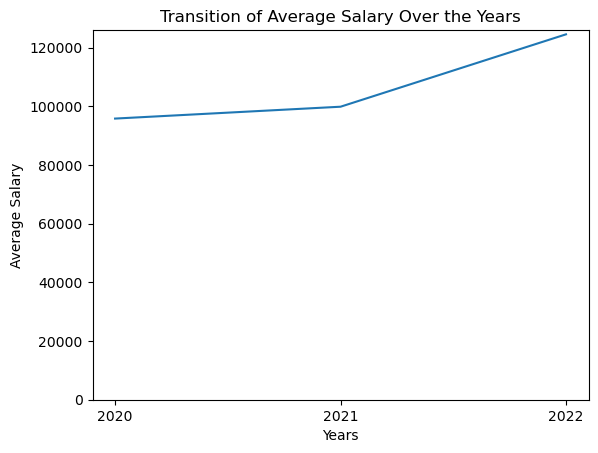

In [41]:
df1 = mean_category(df, 'work_year')
sns.lineplot(data=df1, x='work_year', y='salary')\
    .set(title= "Transition of Average Salary Over the Years",
         xlabel = "Years", ylabel = "Average Salary")
plt.ylim(0)
plt.xticks(df1['work_year'])
plt.show()


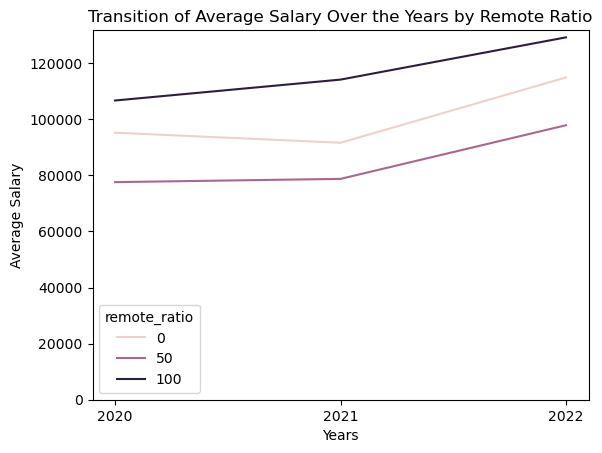

In [42]:
df1 = mean_melt(df, 'work_year', 'remote_ratio', 'salary', 
                      [2020,2021,2022], [0,50,100])
sns.lineplot(data=df1, x='work_year', y='mean', hue='remote_ratio')\
    .set(title= "Transition of Average Salary Over the Years by Remote Ratio",
         xlabel = "Years", ylabel = "Average Salary")
plt.ylim(0)
plt.xticks([2020,2021,2022])
plt.show()

### Analysis 5.0

From the first plot, I see the tendency that the average salary increases over the years. This tendency is consistent for any remote ratio. The tendency that the combination of remote and in-person working is the worst is consistent. 
In this analysis, there are three major factors that may affect the average salary of data scientist.   
- As COVID-19 hit us in 2020, the economy in general had a huge damage. But as time goes on, it has been recovered to its original level. 
- Potentially, Data Science is not a job that necessarily requires in-person working. Therefore, the average salary of data scientists may had less negative impact than other jobs in general. 
- The economy in general tends to grow gradually. Therefore, the average salary should increase even without recovering from the damage because of COVID.    

In this dataset, I only have a salary in 2020-2022 and salary of data scientists. Due to the limitation of the dataset, it is hard to analyze the factors raised above. 

## Q6. Is there any difference in effectiveness of remote working when the company location and employee's residence are the same and different?

In [43]:
df_same = df[df['employee_residence']==df['company_location']]
df_diff = df[df['employee_residence']!=df['company_location']]

,remote_ratio,count
0,0,123
1,50,90
2,100,343


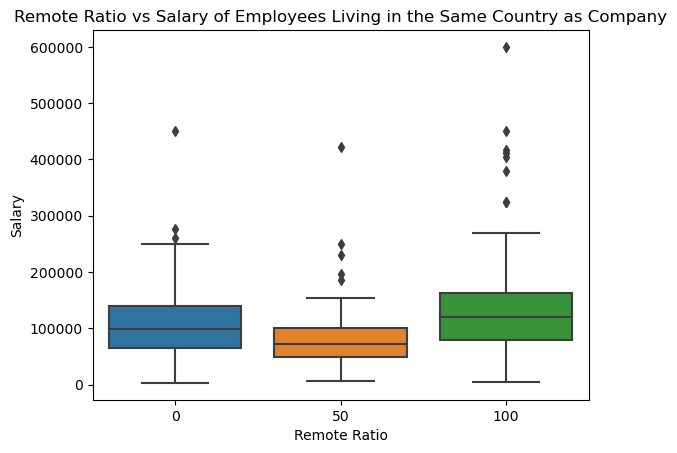

<Figure size 640x480 with 0 Axes>

In [44]:
display(yuki.count_category(df_same,'remote_ratio')
        .sort_values(by='remote_ratio')
        .reset_index(drop=True))
yuki.boxplot(df_same, 'remote_ratio', 'salary', 
             title= "Remote Ratio vs Salary of Employees Living in the Same Country as Company",
             xlabel = "Remote Ratio", ylabel = "Salary")
plt.show()

,remote_ratio,count
0,0,4
1,50,9
2,100,38


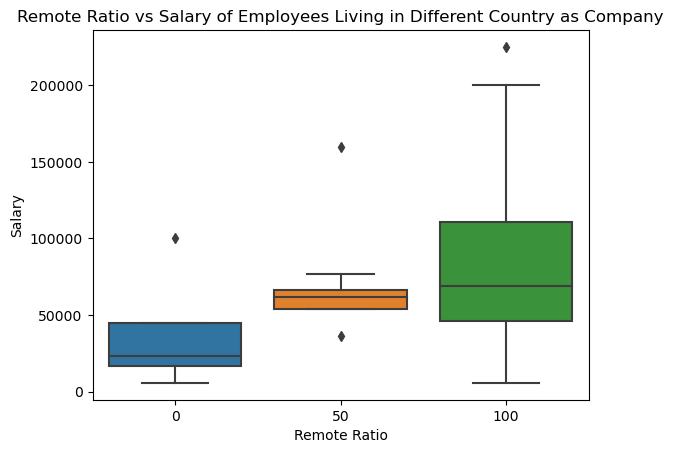

<Figure size 640x480 with 0 Axes>

In [45]:
display(yuki.count_category(df_diff,'remote_ratio')
        .sort_values(by='remote_ratio')
        .reset_index(drop=True))
yuki.boxplot(df_diff, 'remote_ratio', 'salary', 
             title= "Remote Ratio vs Salary of Employees Living in Different Country as Company",
             xlabel = "Remote Ratio", ylabel = "Salary")
plt.show()

### Analysis 6.0

Based on the two plots above, remote working has more advantages for employees living in different country than employees living in the same country as the company. As the df_same holds `556/607=91.6%` of the dataset, the shape of the plot is homogeneous as Analysis 1. This tells that when employees have an option to work in-person, doing so and working fully remotely do not have much differences. 
On the other hand, when employees do not have an option to do in-person working, more remote working provides better productivity. However, as there is a limited number of data in df_diff, the second plot may not be as reliable as the first plot. 

# Remaining Task

- categorize jobs into a few groups
